In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy
import scipy.signal as signal
import seaborn as sns
import pandas as pd

In [2]:
x = loadmat('C:/Users/rajra/OneDrive/Desktop/books/analysis of neural data/Ch9-spikes-1')

In [3]:
X = x['X']
X = X[:,0]

t = x['t']
t = t[:,0]

spikes = x['spiketimes']
spikes = spikes[:,0]

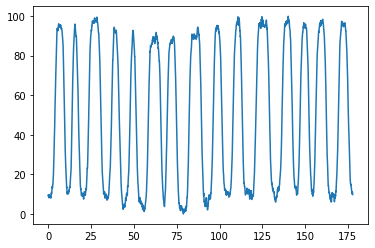

In [4]:
plt.plot(t,X)

In [5]:
bins = (max(t) - min(t))/(t[1]-t[0]) + 1
spiketrain,_ = np.histogram(spikes,int(bins),(min(t),max(t)))

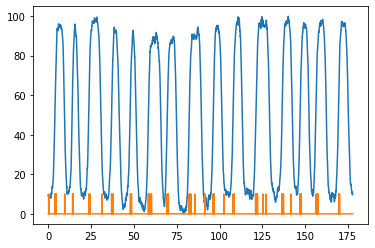

In [6]:
plt.plot(t,X)
plt.plot(t,10*spiketrain)

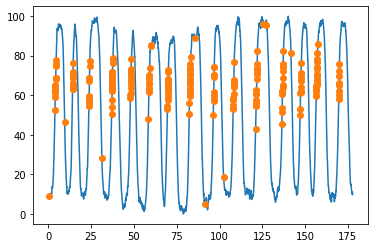

In [7]:
plt.plot(t,X)
spike_index = [i for i,x in enumerate(spiketrain) if x == 1]
plt.plot(t[spike_index],X[spike_index],"o")

<BarContainer object of 11 artists>

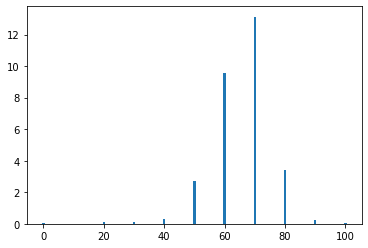

In [8]:
bins = 100/10 + 1
spike_hist,bins1 = np.histogram(X[spike_index],int(bins),(0,100))
occupancy,bins2 = np.histogram(X,int(bins),(0,100))
occupancy = occupancy*0.001
hist_height = np.divide(spike_hist,occupancy)
plt.bar(np.arange(0,110,10),hist_height)

In [9]:
import statsmodels.api as sm

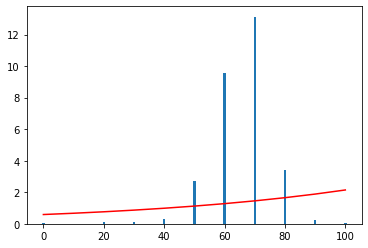

In [10]:
#Poisson model

exog, endog = sm.add_constant(X),spiketrain
poisson_model = sm.GLM(endog,exog,family=sm.families.Poisson())
poisson_results =poisson_model.fit()
poisson_results.params[1]
plt.bar(np.arange(0,110,10),hist_height)
bins = np.arange(0,110,10)
plt.plot(bins,np.exp(poisson_results.params[0] + poisson_results.params[1]*bins)*1000,c="r")

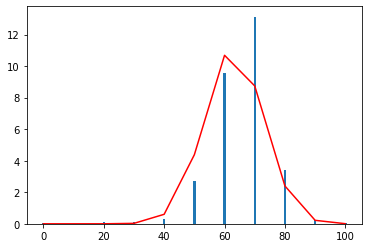

In [11]:
#Poisson model with squared term 

import statsmodels.formula.api as smf
bins = np.arange(0,110,10)
data = {'X':X,'spiketrain':spiketrain,'X2':np.power(X,2)}
df = pd.DataFrame(data)
poisson_results2 = smf.glm(formula='spiketrain ~ X + X2',data=df,family=sm.families.Poisson()).fit()

plt.bar(np.arange(0,110,10),hist_height)
plt.plot(bins,np.exp(poisson_results2.params[0] + poisson_results2.params[1]*bins+ poisson_results2.params[2]*np.power(bins,2))*1000,c="r")

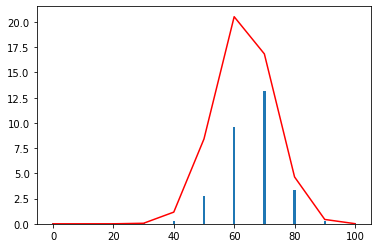

In [12]:
#Poisson model with squared term and difference
diff = np.diff(X)
diff = np.append(0,diff)
diff[diff > 0] = 1
diff[diff < 0] = 0
df['diff'] =  diff

poisson_results3 = smf.glm(formula='spiketrain ~ X + X2 + diff',data=df,family=sm.families.Poisson()).fit()

plt.bar(np.arange(0,110,10),hist_height)
diff_bins = np.diff(bins)
diff_bins = np.append(0,diff_bins)
diff_bins[diff_bins > 0] = 1
diff_bins[diff_bins < 0] = 0
plt.plot(bins,np.exp(poisson_results3.params[0] + poisson_results3.params[1]*bins+ poisson_results3.params[2]*np.power(bins,2) + poisson_results3.params[3]*diff_bins)*1000,c="r")

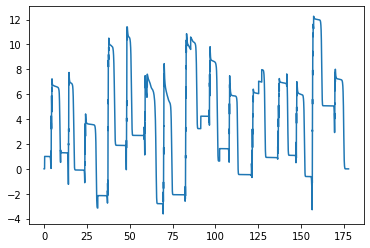

In [49]:
#Poisson model with squared term 
lam = np.exp(poisson_results2.params[0] + poisson_results2.params[1]*X + poisson_results2.params[2]*np.power(X,2))
resid = spiketrain - lam
r = np.cumsum(resid)
plt.plot(t,r)

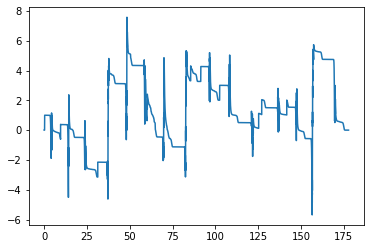

In [50]:
#Poisson model with squared term and difference
lam2 = np.exp(poisson_results3.params[0] + poisson_results3.params[1]*X+ poisson_results3.params[2]*np.power(X,2) + poisson_results3.params[3]*diff)
resid2 = spiketrain - lam2
r2 = np.cumsum(resid2)
plt.plot(t,r2)